In [2]:
# Reading the JSON files
import json

# Reading the JSON files
training_challenges_file = './arc-agi_training_challenges.json'
training_solutions_file = './arc-agi_training_solutions.json'

def read_json_file(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

X_data = read_json_file(training_challenges_file)
y_data = read_json_file(training_solutions_file)

In [3]:
X_data_keys = list(X_data.keys())
print(f"🔑 There are {len(X_data_keys)} keys")
print(f"First five keys: {X_data_keys[:5]}")

🔑 There are 400 keys
First five keys: ['007bbfb7', '00d62c1b', '017c7c7b', '025d127b', '045e512c']


In [4]:
example_problem_X = X_data['3aa6fb7a']
print(f"number of test problems: {len(example_problem_X['test'])}")
example_problem_X['test']


number of test problems: 1


[{'input': [[0, 0, 0, 0, 0, 8, 8],
   [8, 8, 0, 0, 0, 0, 8],
   [8, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 8, 0, 0, 0],
   [0, 0, 0, 8, 8, 0, 0],
   [0, 8, 0, 0, 0, 0, 0],
   [8, 8, 0, 0, 0, 0, 0]]}]

In [5]:
print(f"number of test cases: {len(example_problem_X['test'])}")
example_problem_X['train']

number of test cases: 1


[{'input': [[0, 0, 0, 0, 0, 0, 0],
   [0, 8, 0, 0, 0, 0, 0],
   [0, 8, 8, 0, 0, 0, 0],
   [0, 0, 0, 0, 8, 8, 0],
   [0, 0, 0, 0, 0, 8, 0],
   [0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0]],
  'output': [[0, 0, 0, 0, 0, 0, 0],
   [0, 8, 1, 0, 0, 0, 0],
   [0, 8, 8, 0, 0, 0, 0],
   [0, 0, 0, 0, 8, 8, 0],
   [0, 0, 0, 0, 1, 8, 0],
   [0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0]]},
 {'input': [[0, 0, 0, 0, 8, 8, 0],
   [0, 0, 0, 0, 0, 8, 0],
   [0, 0, 8, 0, 0, 0, 0],
   [0, 0, 8, 8, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 8, 0, 0],
   [0, 0, 0, 8, 8, 0, 0]],
  'output': [[0, 0, 0, 0, 8, 8, 0],
   [0, 0, 0, 0, 1, 8, 0],
   [0, 0, 8, 1, 0, 0, 0],
   [0, 0, 8, 8, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 1, 8, 0, 0],
   [0, 0, 0, 8, 8, 0, 0]]}]

In [6]:
# for i, obj in enumerate(X_data['3aa6fb7a']['train']):
#     print(f"Example {i+1}")
#     input = obj['input']
#     print(f"input n_row={len(input)} n_col={len(input[0])}")
#     for row in input:
#         print(row)
#     output = obj['output']
#     print(f"output n_row={len(output)} n_col={len(output[0])}")
#     for row in output:
#         print(row)

In [7]:
y_data['3aa6fb7a']

[[[0, 0, 0, 0, 0, 8, 8],
  [8, 8, 0, 0, 0, 1, 8],
  [8, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 8, 1, 0, 0],
  [0, 0, 0, 8, 8, 0, 0],
  [1, 8, 0, 0, 0, 0, 0],
  [8, 8, 0, 0, 0, 0, 0]]]

In [8]:
X_data['25ff71a9']

{'test': [{'input': [[2, 0, 0], [2, 0, 0], [0, 0, 0]]},
  {'input': [[0, 0, 0], [0, 1, 0], [0, 0, 0]]}],
 'train': [{'input': [[1, 1, 1], [0, 0, 0], [0, 0, 0]],
   'output': [[0, 0, 0], [1, 1, 1], [0, 0, 0]]},
  {'input': [[0, 0, 0], [1, 1, 1], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 0, 0], [1, 1, 1]]},
  {'input': [[0, 1, 0], [1, 1, 0], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 1, 0], [1, 1, 0]]},
  {'input': [[0, 2, 2], [0, 0, 2], [0, 0, 0]],
   'output': [[0, 0, 0], [0, 2, 2], [0, 0, 2]]}]}

In [15]:
only_first_five = {}

all_same_input_dims = []
diff_input_dims = []

for key in X_data_keys[:5]:
    print(f"\n🔑 {key} input dim -> output dim")
    arc_problem = X_data[key]
    train_examples = arc_problem["train"]

    consistent_sizing = set()
    input_sizes = set()
    output_sizes = set()
    multipliers = set()
    resize_occurs = False

    for ex in train_examples:
        # "row x col"
        input_details = ex['input']
        input_dims = f"{len(input_details)}x{len(input_details[0])}"
        output_details = ex['output']
        output_dims = f"{len(output_details)}x{len(output_details[0])}"
        transition = f"{input_dims} -> {output_dims}"

        resized = None
        if input_dims == output_dims:
            resized = "same dims"
        else:
            resized = "resized"
            resize_occurs = True

        print(f"{input_dims} -> {output_dims}")
        multiplier_row = len(output_details) / len(input_details)
        multiplier_col = len(output_details[0]) / len(input_details[0])
        print(f"multiplier_row={multiplier_row} multiplier_col={multiplier_col}")
        multiplier = f"{multiplier_row}x{multiplier_col}"
        multipliers.add(multiplier)
        # print(ex)

        input_sizes.add(input_dims)
        output_sizes.add(output_dims)

    print(f"input_sizes: {input_sizes}")
    print(f"output_sizes: {output_sizes}")
    if len(input_sizes) == 1 and len(output_sizes) == 1:
        print("same input dim and output dim for all examples")
    if len(multipliers) == 1:
        print("same multiplier for all examples")

    # only one in the training set
    # sizes_can_differ = len(consistent_sizing) > 1
    len_input_sizes = len(input_sizes)
    len_output_sizes = len(output_sizes)
    print(f"any_resized={resize_occurs} uniq_in={len_input_sizes} uniq_out={len_output_sizes}")

    if len(input_sizes) == 1:
        all_same_input_dims.append(key)
    else:
        diff_input_dims.append(key)

    # if sizes_can_differ:
        # raise ValueError("Multiple transitions found")

print(all_same_input_dims)


🔑 007bbfb7 input dim -> output dim
3x3 -> 9x9
multiplier_row=3.0 multiplier_col=3.0
3x3 -> 9x9
multiplier_row=3.0 multiplier_col=3.0
3x3 -> 9x9
multiplier_row=3.0 multiplier_col=3.0
3x3 -> 9x9
multiplier_row=3.0 multiplier_col=3.0
3x3 -> 9x9
multiplier_row=3.0 multiplier_col=3.0
input_sizes: {'3x3'}
output_sizes: {'9x9'}
same input dim and output dim for all examples
same multiplier for all examples
any_resized=True uniq_in=1 uniq_out=1

🔑 00d62c1b input dim -> output dim
6x6 -> 6x6
multiplier_row=1.0 multiplier_col=1.0
10x10 -> 10x10
multiplier_row=1.0 multiplier_col=1.0
10x10 -> 10x10
multiplier_row=1.0 multiplier_col=1.0
10x10 -> 10x10
multiplier_row=1.0 multiplier_col=1.0
20x20 -> 20x20
multiplier_row=1.0 multiplier_col=1.0
input_sizes: {'6x6', '10x10', '20x20'}
output_sizes: {'6x6', '10x10', '20x20'}
same multiplier for all examples
any_resized=False uniq_in=3 uniq_out=3

🔑 017c7c7b input dim -> output dim
6x3 -> 9x3
multiplier_row=1.5 multiplier_col=1.0
6x3 -> 9x3
multiplier_row

In [5]:
import pandas as pd
from collections import Counter

dimension_counts = {
    'input_dim': Counter(),
    'output_dim': Counter(),
    'transition': Counter()
}

for key in X_data_keys:
    arc_problem = X_data[key]
    train_examples = arc_problem["train"]

    for ex in train_examples:
        input_details = ex['input']
        input_dims = f"{len(input_details)}x{len(input_details[0])}"
        output_details = ex['output']
        output_dims = f"{len(output_details)}x{len(output_details[0])}"
        transition = f"{input_dims} -> {output_dims}"

        dimension_counts['input_dim'][input_dims] += 1
        dimension_counts['output_dim'][output_dims] += 1
        dimension_counts['transition'][transition] += 1

# Create DataFrames
input_df = pd.DataFrame(dimension_counts['input_dim'].items(), columns=['Input Dimension', 'Count']).sort_values('Count', ascending=False)
output_df = pd.DataFrame(dimension_counts['output_dim'].items(), columns=['Output Dimension', 'Count']).sort_values('Count', ascending=False)
transition_df = pd.DataFrame(dimension_counts['transition'].items(), columns=['Transition', 'Count']).sort_values('Count', ascending=False)

In [6]:
print("Input Dimensions:")
display(input_df)

Input Dimensions:


Input Dimension  Count
2             10x10    201
0               3x3    157
13              9x9     62
44              5x5     43
15            12x12     33
..              ...    ...
209           19x21      1
216           19x13      1
214           23x27      1
213            4x17      1
219           13x10      1

[221 rows x 2 columns]

In [7]:

# Display DataFrames
print("Input Dimensions:")
print(input_df)
print("\nOutput Dimensions:")
print(output_df)
print("\nTransitions:")
print(transition_df)

# Optionally, you can save these DataFrames to CSV files
input_df.to_csv('input_dimensions.csv', index=False)
output_df.to_csv('output_dimensions.csv', index=False)
transition_df.to_csv('transitions.csv', index=False)

Input Dimensions:
    Input Dimension  Count
2             10x10    201
0               3x3    157
13              9x9     62
44              5x5     43
15            12x12     33
..              ...    ...
209           19x21      1
216           19x13      1
214           23x27      1
213            4x17      1
219           13x10      1

[221 rows x 2 columns]

Output Dimensions:
    Output Dimension  Count
8                3x3    190
2              10x10    181
0                9x9     60
40               4x4     56
1                6x6     49
..               ...    ...
176             3x12      1
183            12x16      1
182            19x21      1
185             9x17      1
187            19x13      1

[189 rows x 2 columns]

Transitions:
         Transition  Count
2    10x10 -> 10x10    171
23       3x3 -> 3x3     77
13       9x9 -> 9x9     32
80   15x15 -> 15x15     30
15   12x12 -> 12x12     26
..              ...    ...
381    22x25 -> 3x3      1
382    21x22 -> 7x7     

In [8]:
import pandas as pd
from collections import defaultdict

dimension_counts = {
    'input_dim': defaultdict(lambda: {'count': 0, 'keys': set()}),
    'output_dim': defaultdict(lambda: {'count': 0, 'keys': set()}),
    'transition': defaultdict(lambda: {'count': 0, 'keys': set()})
}

for key in X_data_keys:
    arc_problem = X_data[key]
    train_examples = arc_problem["train"]

    for ex in train_examples:
        input_details = ex['input']
        input_dims = f"{len(input_details)}x{len(input_details[0])}"
        output_details = ex['output']
        output_dims = f"{len(output_details)}x{len(output_details[0])}"
        transition = f"{input_dims} -> {output_dims}"

        dimension_counts['input_dim'][input_dims]['count'] += 1
        dimension_counts['input_dim'][input_dims]['keys'].add(key)
        dimension_counts['output_dim'][output_dims]['count'] += 1
        dimension_counts['output_dim'][output_dims]['keys'].add(key)
        dimension_counts['transition'][transition]['count'] += 1
        dimension_counts['transition'][transition]['keys'].add(key)


In [9]:
for dimension, counts in dimension_counts.items():
    print(f"\n{dimension.upper()} - Keys in descending count order (20):")

    # Sort the items by count in descending order
    sorted_items = sorted(counts.items(), key=lambda x: x[1]['count'], reverse=True)

    # Print each key with its count
    print(f'{" i":2}: {"transition":15}: {"cnt":3} : {"example key"}')
    print("-----------------------------------------")
    for i, (key, value) in enumerate(sorted_items[:20]):
        print(f"{i+1:2}: {key:15}: {value['count']:3} : {list(value['keys'])[0]}")


INPUT_DIM - Keys in descending count order (20):
 i: transition     : cnt : example key
-----------------------------------------
 1: 10x10          : 201 : 8d510a79
 2: 3x3            : 157 : ed36ccf7
 3: 9x9            :  62 : 4258a5f9
 4: 5x5            :  43 : 2dc579da
 5: 12x12          :  33 : 2bee17df
 6: 15x15          :  32 : 95990924
 7: 7x7            :  31 : 3de23699
 8: 11x11          :  30 : 09629e4f
 9: 13x13          :  28 : 846bdb03
10: 6x6            :  27 : 93b581b8
11: 20x20          :  26 : 50846271
12: 8x8            :  25 : 75b8110e
13: 16x16          :  20 : 3345333e
14: 21x21          :  16 : 890034e9
15: 5x7            :  15 : 239be575
16: 30x30          :  13 : a64e4611
17: 9x4            :  12 : 6430c8c4
18: 3x4            :  11 : 9af7a82c
19: 3x11           :  11 : 8e5a5113
20: 14x14          :  11 : b775ac94

OUTPUT_DIM - Keys in descending count order (20):
 i: transition     : cnt : example key
-----------------------------------------
 1: 3x3          

In [10]:
dimension_counts['input_dim'].keys()

dict_keys(['3x3', '6x6', '10x10', '20x20', '6x3', '14x9', '8x9', '21x21', '3x7', '7x7', '9x10', '11x10', '23x23', '9x9', '11x11', '12x12', '10x25', '7x23', '22x9', '24x8', '18x19', '19x17', '14x18', '14x15', '16x14', '2x4', '3x4', '5x3', '4x4', '15x15', '27x27', '9x11', '8x10', '10x8', '10x11', '15x14', '15x16', '5x7', '23x21', '13x16', '17x18', '5x10', '10x12', '11x12', '5x5', '17x17', '30x30', '3x9', '3x11', '6x7', '10x15', '13x15', '18x15', '7x13', '12x11', '9x6', '5x6', '7x6', '15x12', '12x14', '8x8', '13x13', '5x11', '18x18', '9x12', '14x12', '4x12', '2x6', '16x16', '13x5', '9x13', '14x14', '24x24', '6x10', '8x30', '8x20', '12x9', '12x18', '3x30', '4x20', '2x20', '11x13', '30x20', '20x10', '13x17', '16x11', '11x19', '17x9', '18x16', '8x7', '2x2', '29x29', '20x30', '10x3', '10x5', '2x3', '14x16', '9x7', '11x9', '20x22', '12x13', '13x7', '7x11', '4x16', '17x5', '7x8', '6x11', '16x12', '16x18', '15x18', '20x24', '22x23', '24x23', '22x22', '9x4', '18x13', '11x16', '9x3', '4x6', '19x8'

In [11]:

# Function to create DataFrame from dimension counts
def create_df(data):
    df = pd.DataFrame([
        {
            'Dimension': dim,
            'Count': info['count'],
            'Keys': ', '.join(sorted(info['keys']))
        }
        for dim, info in data.items()
    ])
    return df.sort_values('Count', ascending=False).reset_index(drop=True)

# Create DataFrames
input_df = create_df(dimension_counts['input_dim'])
output_df = create_df(dimension_counts['output_dim'])
transition_df = create_df(dimension_counts['transition'])

# Display DataFrames
print("Input Dimensions:")
print(input_df)
print("\nOutput Dimensions:")
print(output_df)
print("\nTransitions:")
print(transition_df)

# Optionally, you can save these DataFrames to CSV files
input_df.to_csv('input_dimensions_with_keys.csv', index=False)
output_df.to_csv('output_dimensions_with_keys.csv', index=False)
transition_df.to_csv('transitions_with_keys.csv', index=False)

Input Dimensions:
    Dimension  Count                                               Keys
0       10x10    201  00d62c1b, 11852cab, 1b60fb0c, 1bfc4729, 1caeab...
1         3x3    157  007bbfb7, 0d3d703e, 253bf280, 25d8a9c8, 25ff71...
2         9x9     62  08ed6ac7, 0ca9ddb6, 178fcbfb, 1f0c79e5, 1fad07...
3         5x5     43  1e0a9b12, 239be575, 2dc579da, 3618c87e, 469497...
4       12x12     33  0962bcdd, 1cf80156, 25d487eb, 2bee17df, 44d8ac...
..        ...    ...                                                ...
216     19x21      1                                           e509e548
217     19x13      1                                           f1cefba8
218     23x27      1                                           eb5a1d5d
219      4x17      1                                           eb281b96
220     13x10      1                                           f8b3ba0a

[221 rows x 3 columns]

Output Dimensions:
    Dimension  Count                                               Keys
0 

In [12]:
import pandas as pd
import numpy as np

# List to store all transitions
transitions = []

for key in X_data_keys:
    arc_problem = X_data[key]
    train_examples = arc_problem["train"]

    for ex in train_examples:
        input_details = ex['input']
        input_dims = f"{len(input_details)}x{len(input_details[0])}"
        output_details = ex['output']
        output_dims = f"{len(output_details)}x{len(output_details[0])}"

        transitions.append({
            'input_dim': input_dims,
            'output_dim': output_dims,
            'key': key
        })

# Create DataFrame from transitions
df = pd.DataFrame(transitions)

# Create a pivot table
pivot = pd.pivot_table(df, values='key', index='input_dim', columns='output_dim', aggfunc='count', fill_value=0)

# Sort the index and columns
def sort_key(dim):
    return tuple(map(int, dim.split('x')))

pivot = pivot.sort_index(key=lambda x: [sort_key(i) for i in x])
pivot = pivot.sort_index(axis=1, key=lambda x: [sort_key(i) for i in x])

# Display the pivot table
print("Transition Counts (Input Dimensions vs Output Dimensions):")
print(pivot)

Transition Counts (Input Dimensions vs Output Dimensions):
output_dim  1x1  1x2  1x3  1x4  1x5  2x2  2x3  2x4  2x6  2x20  ...  22x9  \
input_dim                                                      ...         
1x5           0    0    0    0    0    0    0    0    0     0  ...     0   
1x6           0    0    0    0    0    0    0    0    0     0  ...     0   
1x8           0    0    0    0    0    0    0    0    0     0  ...     0   
1x10          0    0    0    0    0    0    0    0    0     0  ...     0   
2x2           0    0    0    0    0    0    0    0    0     0  ...     0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   
28x28         0    0    0    0    0    0    0    0    0     0  ...     0   
29x29         0    0    0    0    0    0    0    0    0     0  ...     0   
30x17         0    0    0    0    0    0    0    0    0     0  ...     0   
30x20         0    0    0    0    0    0    0    0    0     0  ...     0   
30x30         0    0    0    

In [13]:

# Optionally, save to CSV
pivot.to_csv('transition_matrix.csv')

# If you want to visualize this as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Transition Counts: Input Dimensions vs Output Dimensions')
plt.tight_layout()
plt.savefig('transition_heatmap.png')
plt.close()

print("\nHeatmap saved as 'transition_heatmap.png'")

KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List to store all transitions
transitions = []

for key in X_data_keys:
    arc_problem = X_data[key]
    train_examples = arc_problem["train"]

    for ex in train_examples:
        input_details = ex['input']
        input_dims = f"{len(input_details)}x{len(input_details[0])}"
        output_details = ex['output']
        output_dims = f"{len(output_details)}x{len(output_details[0])}"

        transitions.append({
            'input_dim': input_dims,
            'output_dim': output_dims,
            'key': key
        })

# Create DataFrame from transitions
df = pd.DataFrame(transitions)

NameError: name 'X_data_keys' is not defined

Transition Counts (Input Dimensions vs Output Dimensions):


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x10d81a840> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

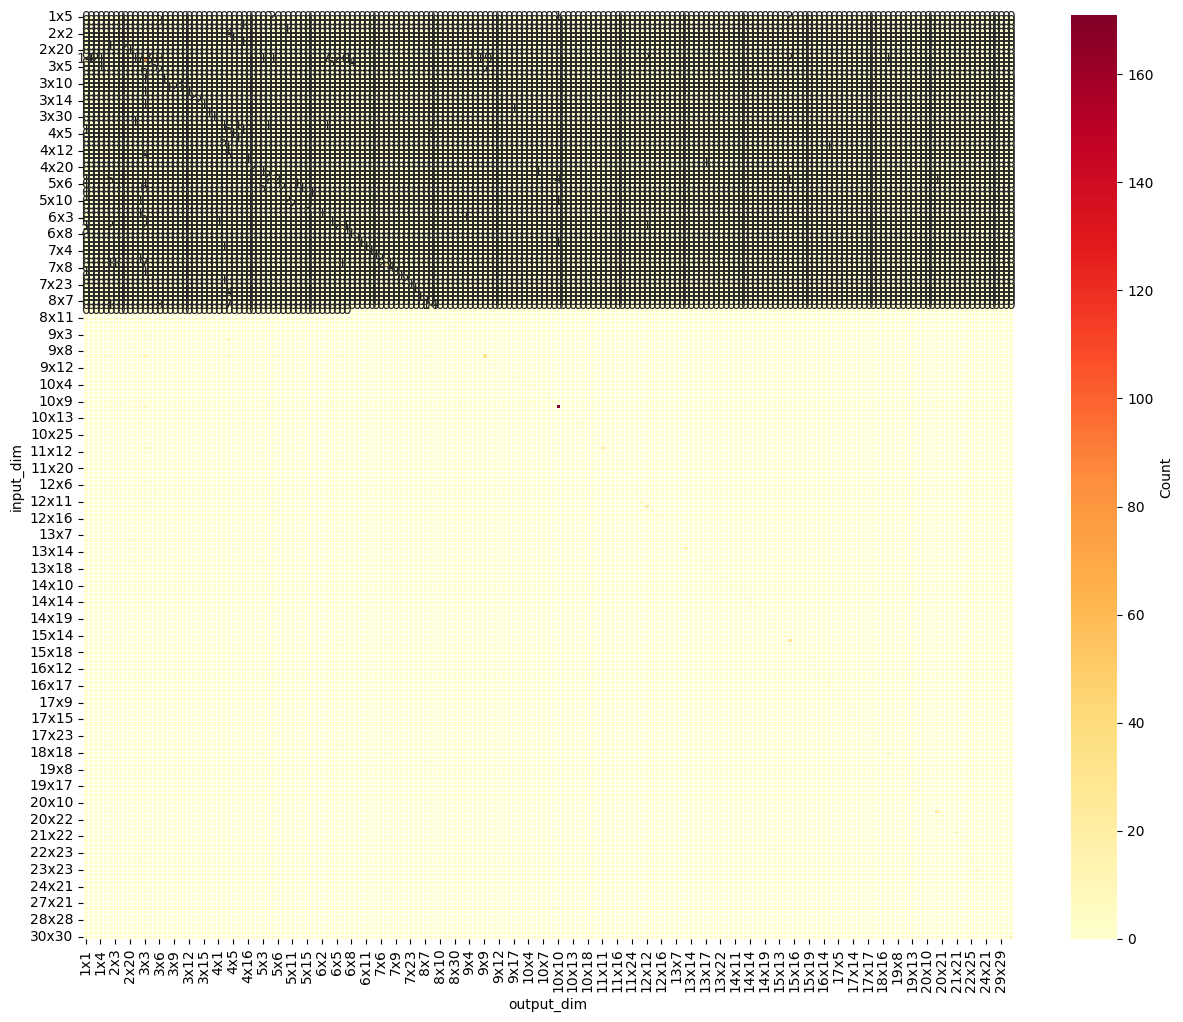

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List to store all transitions
transitions = []

for key in X_data_keys:
    arc_problem = X_data[key]
    train_examples = arc_problem["train"]

    for ex in train_examples:
        input_details = ex['input']
        input_dims = f"{len(input_details)}x{len(input_details[0])}"
        output_details = ex['output']
        output_dims = f"{len(output_details)}x{len(output_details[0])}"

        transitions.append({
            'input_dim': input_dims,
            'output_dim': output_dims,
            'key': key
        })

# Create DataFrame from transitions
df = pd.DataFrame(transitions)

# Create a pivot table
pivot = pd.pivot_table(df, values='key', index='input_dim', columns='output_dim', aggfunc='count', fill_value=0)

# Sort the index and columns
def sort_key(dim):
    return tuple(map(int, dim.split('x')))

pivot = pivot.sort_index(key=lambda x: [sort_key(i) for i in x])
pivot = pivot.sort_index(axis=1, key=lambda x: [sort_key(i) for i in x])

# Display the pivot table with better formatting
print("Transition Counts (Input Dimensions vs Output Dimensions):")
display(pivot.style.background_gradient(cmap='YlOrRd')
        .set_properties(**{'font-size': '10pt', 'text-align': 'center'})
        .format("{:.0f}"))

# Create a more visually appealing heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5,
            cbar_kws={'label': 'Count'})
plt.title('Transition Counts: Input Dimensions vs Output Dimensions', fontsize=16)
plt.xlabel('Output Dimensions', fontsize=12)
plt.ylabel('Input Dimensions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
from collections import Counter

# Dictionary to store transition counts
transition_counts = Counter()

for key in X_data_keys:
    arc_problem = X_data[key]
    train_examples = arc_problem["train"]

    for ex in train_examples:
        input_details = ex['input']
        input_dims = f"{len(input_details)}x{len(input_details[0])}"
        output_details = ex['output']
        output_dims = f"{len(output_details)}x{len(output_details[0])}"

        transition = f"{input_dims} -> {output_dims}"
        transition_counts[transition] += 1

# Convert to DataFrame and sort
df = pd.DataFrame(transition_counts.items(), columns=['Transition', 'Count'])
df = df.sort_values('Count', ascending=False).reset_index(drop=True)

# Display the results
print("Transition Counts (sorted by count):")
print(df.to_string(index=False))

Transition Counts (sorted by count):
    Transition  Count
10x10 -> 10x10    171
    3x3 -> 3x3     77
    9x9 -> 9x9     32
15x15 -> 15x15     30
12x12 -> 12x12     26
    5x5 -> 5x5     22
    6x6 -> 6x6     21
    7x7 -> 7x7     21
20x20 -> 20x20     21
    3x3 -> 6x6     20
    3x3 -> 9x9     19
13x13 -> 13x13     16
11x11 -> 11x11     16
16x16 -> 16x16     14
    8x8 -> 8x8     14
    3x3 -> 1x1     14
  10x10 -> 3x3     14
    9x9 -> 3x3     13
    9x4 -> 4x4     12
21x21 -> 21x21     12
30x30 -> 30x30     11
23x23 -> 23x23     10
    5x5 -> 3x3      9
  11x11 -> 3x3      8
  3x11 -> 3x11      8
    3x3 -> 3x6      8
    3x3 -> 6x3      7
18x18 -> 18x18      7
14x14 -> 14x14      7
    8x8 -> 4x4      7
17x17 -> 17x17      7
    7x7 -> 3x3      7
    3x6 -> 3x3      6
    9x9 -> 4x4      6
    5x7 -> 3x3      6
12x14 -> 12x14      6
12x11 -> 12x11      6
    4x4 -> 4x4      6
   4x14 -> 4x4      5
  10x4 -> 10x4      5
    5x5 -> 2x2      5
  10x8 -> 10x8      5
19x19 -> 19x19   

In [20]:
import pandas as pd
from collections import defaultdict

# Dictionary to store transition information
transition_info = defaultdict(lambda: {'count': 0, 'keys': set()})

for key in X_data_keys:
    arc_problem = X_data[key]
    train_examples = arc_problem["train"]

    for ex in train_examples:
        input_details = ex['input']
        input_dims = f"{len(input_details)}x{len(input_details[0])}"
        output_details = ex['output']
        output_dims = f"{len(output_details)}x{len(output_details[0])}"

        transition = f"{input_dims} -> {output_dims}"
        transition_info[transition]['count'] += 1
        transition_info[transition]['keys'].add(key)

# Convert to DataFrame and sort
df = pd.DataFrame([
    {
        'Transition': transition,
        'Count': info['count'],
        'Example Key': next(iter(info['keys'])),  # Get the first key from the set
        'All Keys': info['keys']  # Keep all keys in the DataFrame
    }
    for transition, info in transition_info.items()
])
df = df.sort_values('Count', ascending=False).reset_index(drop=True)

# Display the results (excluding the 'All Keys' column)
print("Transition Counts with Example Keys (sorted by count):")
print(df[['Transition', 'Count', 'Example Key']].to_string(index=False))


Transition Counts with Example Keys (sorted by count):
    Transition  Count Example Key
10x10 -> 10x10    171    e48d4e1a
    3x3 -> 3x3     77    9dfd6313
    9x9 -> 9x9     32    ec883f72
15x15 -> 15x15     30    db93a21d
12x12 -> 12x12     26    508bd3b6
    5x5 -> 5x5     22    9dfd6313
    6x6 -> 6x6     21    67a423a3
    7x7 -> 7x7     21    dc433765
20x20 -> 20x20     21    db93a21d
    3x3 -> 6x6     20    46442a0e
    3x3 -> 9x9     19    4522001f
13x13 -> 13x13     16    ba97ae07
11x11 -> 11x11     16    dc433765
16x16 -> 16x16     14    91714a58
    8x8 -> 8x8     14    67a423a3
    3x3 -> 1x1     14    44f52bb0
  10x10 -> 3x3     14    48d8fb45
    9x9 -> 3x3     13    5bd6f4ac
    9x4 -> 4x4     12    ce4f8723
21x21 -> 21x21     12    0dfd9992
30x30 -> 30x30     11    a64e4611
23x23 -> 23x23     10    7b6016b9
    5x5 -> 3x3      9    d4469b4b
  11x11 -> 3x3      8    6773b310
  3x11 -> 3x11      8    ba26e723
    3x3 -> 3x6      8    c9e6f938
    3x3 -> 6x3      7    6f